In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

#imports from Keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [2]:
apple_df = pd.read_csv('apple.csv', parse_dates=True, index_col=0)
ball_df = pd.read_csv('ball.csv', parse_dates=True, index_col=0)
aflac_df = pd.read_csv('aflac.csv', parse_dates=True, index_col=0)
baxter_df = pd.read_csv('baxter.csv', parse_dates=True, index_col=0)
#test = pd.read_csv('sp500_joined_close.csv', parse_dates=True, index_col=0)
apple_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,4.017857,3.631696,3.745536,3.997768,133949200.0,3.478462
2000-01-04,3.950893,3.613839,3.866071,3.660714,128094400.0,3.185191
2000-01-05,3.948661,3.678571,3.705357,3.714286,194580400.0,3.231803
2000-01-06,3.821429,3.392857,3.790179,3.392857,191993200.0,2.952128
2000-01-07,3.607143,3.410714,3.446429,3.553571,115183600.0,3.091966
...,...,...,...,...,...,...
2019-12-12,272.559998,267.320007,267.779999,271.459991,34327600.0,271.459991
2019-12-13,275.299988,270.929993,271.459991,275.149994,33396900.0,275.149994
2019-12-16,280.790009,276.980011,277.000000,279.859985,32046500.0,279.859985


In [3]:
main_df = pd.DataFrame()
main_df = pd.merge(aflac_df, ball_df, on='Date', suffixes=('_aflac', '_ball'))
baxter_df.rename(columns={
    'High':'High_baxter',
    'Low': 'Low_baxter',
    'Open':'Open_baxter',
    'Close':'Close_baxter',
    'Volume':'Volume_baxter',
    'Adj Close':'Adj Close_baxter'},
                 inplace=True)
apple_df.rename(columns={
    'High':'High_apple',
    'Low': 'Low_apple',
    'Open':'Open_apple',
    'Close':'Close_apple',
    'Volume':'Volume_apple',
    'Adj Close':'Adj Close_apple'},
                 inplace=True)
main_df = main_df.join(baxter_df, how='outer')
main_df = main_df.join(apple_df, how='outer')
main_df.head()

,High_aflac,Low_aflac,Open_aflac,Close_aflac,Volume_aflac,Adj Close_aflac,High_ball,Low_ball,Open_ball,Close_ball,...,Open_baxter,Close_baxter,Volume_baxter,Adj Close_baxter,High_apple,Low_apple,Open_apple,Close_apple,Volume_apple,Adj Close_apple
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,11.781250,11.078125,11.734375,11.187500,2388800.0,5.408165,2.503906,2.433594,2.453125,2.488281,...,16.719852,16.668930,3878200.0,8.401917,4.017857,3.631696,3.745536,3.997768,133949200.0,3.478462
2000-01-04,11.281250,10.812500,10.812500,10.890625,2716400.0,5.264650,2.519531,2.402344,2.472656,2.406250,...,16.397339,16.295492,1740400.0,8.213687,3.950893,3.613839,3.866071,3.660714,128094400.0,3.185191
2000-01-05,11.046875,10.796875,10.906250,10.828125,1354800.0,5.234437,2.476562,2.398438,2.398438,2.449219,...,16.295492,17.008419,4200400.0,8.573032,3.948661,3.678571,3.705357,3.714286,194580400.0,3.231803
2000-01-06,11.109375,10.718750,10.781250,11.046875,2027200.0,5.340185,2.531250,2.457031,2.457031,2.488281,...,16.804726,17.364883,3350600.0,8.752707,3.821429,3.392857,3.790179,3.392857,191993200.0,2.952128
2000-01-07,11.281250,10.968750,11.031250,11.265625,2262000.0,5.445930,2.523438,2.398438,2.496094,2.417969,...,17.483704,18.349403,4469900.0,9.248950,3.607143,3.410714,3.446429,3.553571,115183600.0,3.091966


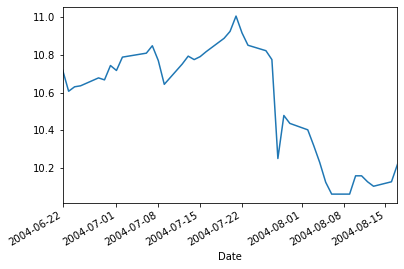

In [4]:
main_df['Adj Close_aflac']['2004-06-22':'2004-08-17'].plot()

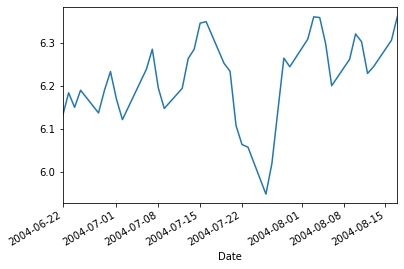

In [5]:
main_df['Adj Close_ball']['2004-06-22':'2004-08-17'].plot()

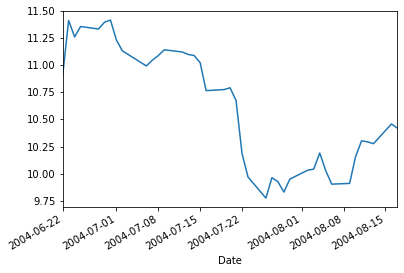

In [6]:
main_df['Adj Close_baxter']['2004-06-22':'2004-08-17'].plot()

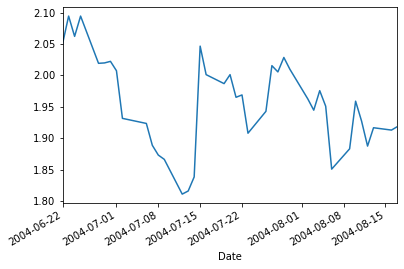

In [7]:
main_df['Adj Close_apple']['2004-06-22':'2004-08-17'].plot()

In [8]:
adj_close_df = main_df[['Adj Close_aflac', 'Adj Close_ball', 'Adj Close_baxter', 'Adj Close_apple']]
shift_steps=1
df_targets = main_df[['Adj Close_apple']].shift(-shift_steps)

In [9]:
adj_close_df[['Adj Close_apple']].head()

,Adj Close_apple
Date,
2000-01-03,3.478462
2000-01-04,3.185191
2000-01-05,3.231803
2000-01-06,2.952128
2000-01-07,3.091966


In [10]:
df_targets.head(5)

,Adj Close_apple
Date,
2000-01-03,3.185191
2000-01-04,3.231803
2000-01-05,2.952128
2000-01-06,3.091966
2000-01-07,3.037585


In [11]:
df_targets.tail(1507)

,Adj Close_apple
Date,
2013-12-24,72.491737
2013-12-26,72.001923
2013-12-27,71.285904
2013-12-30,72.121513
2013-12-31,71.107201
...,...
2019-12-12,275.149994
2019-12-13,279.859985
2019-12-16,280.410004


In [12]:
x_data = adj_close_df.values[0:-shift_steps]
x_data

array([[  5.4081645 ,   0.87092525,   8.4019165 ,   3.47846222],
       [  5.26465034,   0.84221375,   8.21368694,   3.18519092],
       [  5.23443747,   0.85725325,   8.57303238,   3.23180318],
       ...,
       [ 53.16999817,  63.34000015,  83.95999908, 275.1499939 ],
       [ 53.06999969,  63.97000122,  83.86000061, 279.85998535],
       [ 53.11000061,  64.19000244,  83.25      , 280.41000366]])

In [13]:
print(type(x_data))
print("Shape:", x_data.shape)

<class 'numpy.ndarray'>
Shape: (5022, 4)


In [14]:
y_data = df_targets.values[:-shift_steps]

In [15]:
print(type(y_data))
print("Shape:", y_data.shape)

<class 'numpy.ndarray'>
Shape: (5022, 1)


In [16]:
num_data = len(x_data)
train_split = 0.7
num_data

5022

In [17]:
num_train_data = int(train_split * num_data)
num_train_data

3515

In [18]:
num_test_data = num_data - num_train_data
num_test_data

1507

In [19]:
x_train = x_data[0:num_train_data]
x_test = x_data[num_train_data:]
x_test

array([[ 25.97786522,  23.59786797,  32.86774445,  73.2875061 ],
       [ 26.02877426,  23.72770309,  32.94406891,  72.97638702],
       [ 26.27543449,  23.88072968,  33.06810379,  72.49173737],
       ...,
       [ 53.16999817,  63.34000015,  83.95999908, 275.1499939 ],
       [ 53.06999969,  63.97000122,  83.86000061, 279.85998535],
       [ 53.11000061,  64.19000244,  83.25      , 280.41000366]])

In [20]:
y_train = y_data[0:num_train_data]
y_test = y_data[num_train_data:]
y_test

array([[ 72.97638702],
       [ 72.49173737],
       [ 72.00192261],
       ...,
       [279.85998535],
       [280.41000366],
       [279.73999023]])

In [21]:
num_x_signals = x_data.shape[1]
num_x_signals

4

In [22]:
num_y_signals = y_data.shape[1]
num_y_signals

1

In [23]:
#Scale the data
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

In [24]:
x_train_scaled = x_scaler.fit_transform(x_train)

In [25]:
x_test_scaled = x_scaler.fit_transform(x_test)

In [26]:
y_train_scaled = y_scaler.fit_transform(y_train)

In [27]:
y_test_scaled = y_scaler.fit_transform(y_test)

In [28]:
#Based on research into time series prediction it is good train on smaler radom batches rather then the full amount all at once
#The following is a batch function. This function slices the data up into smaller sizes.
def batch_generator(batch_size, sequence_length):
    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(num_train_data - sequence_length)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
        
        yield (x_batch, y_batch)

In [29]:
batch_size = 256

In [30]:
#I want to have a sequence of approximately 6 months of pricing data. Its a full month minus weekends.
sequence_length = 120

In [31]:
generator = batch_generator(batch_size=batch_size,
                            sequence_length=sequence_length)

In [32]:
x_batch, y_batch = next(generator)

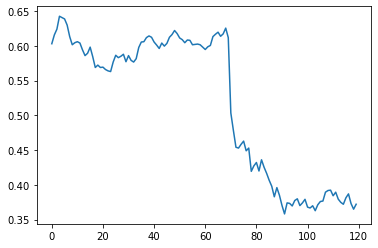

In [33]:
batch = 5   # First sequence in the batch.
signal = 2  # First signal from the 4 input-signals.
seq = x_batch[batch, :, signal]
plt.plot(seq)

In [34]:
#Used to monitor the model's performance. 
#Test on the test set after each epoch and onyl save the model's weights if the performance is improved on the test set.
validation_data = (np.expand_dims(x_test_scaled, axis=0),
                   np.expand_dims(y_test_scaled, axis=0))

In [35]:
#The Seqential class is a linear stack of layers
#creating a sequential model and defining the layers
model = Sequential()

In [36]:
#adding first layer
#adding gated recurrent unit 
model.add(GRU(units=512,
              return_sequences=True,
              input_shape=(None, num_x_signals)))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [37]:
#the GRU outputs a batch of sequences of 512 values, we need to predict 1 output signal
#dense layer maps 512 down to 1 value
#also using the sigmoid activation function
model.add(Dense(num_y_signals, activation='sigmoid'))

In [38]:
#loss Function
#I have chosen to use the mean squared error for the loss function
#This measures how cloesely the models output matches the true output signals
#The warmup_value is used becuause the model has only seen input signals for a few time steps
warmup_steps = 50

def loss_mse_warmup(y_true, y_pred):

    # The shape of both input tensors are:
    # [batch_size, sequence_length, num_y_signals].

    # Ignore the "warmup" parts of the sequences
    # by taking slices of the tensors.
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]

    # These sliced tensors both have this shape:
    # [batch_size, sequence_length - warmup_steps, num_y_signals]

    # Calculate the MSE loss for each value in these tensors.
    # This outputs a 3-rank tensor of the same shape.
    loss = tf.losses.mean_squared_error(labels=y_true_slice,
                                        predictions=y_pred_slice)

    # Keras may reduce this across the first axis (the batch)
    # but the semantics are unclear, so to be sure we use
    # the loss across the entire tensor, we reduce it to a
    # single scalar with the mean function.
    loss_mean = tf.reduce_mean(loss)

    return loss_mean

In [39]:
#This is the optimizer and the very beginning learning rate that will be used
#The optimizer ties the loss function with the model
#It shapes and molds the model into its most accurate form
optimizer = RMSprop(lr=1e-3)

In [40]:
#compiling the model to be trained
model.compile(loss=loss_mse_warmup, optimizer=optimizer)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [41]:
#this shows a summary of the model. This is a very simple model with only two layers.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, None, 512)         794112    
_________________________________________________________________
dense (Dense)                (None, None, 1)           513       
Total params: 794,625
Trainable params: 794,625
Non-trainable params: 0
_________________________________________________________________


In [42]:
#Callback Functions
#A Callback Function is meant to provide a way to get a view of the internal states and stats of the model.
#The first callback is used for writing checkpoints during training
path_checkpoint = '23_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

In [43]:
#this callback is for writing the tensorboard log during training
callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, verbose=1)

In [44]:
#This is the callback for writing the TensorBoard log during training
callback_tensorboard = TensorBoard(log_dir='./23_logs/',
                                   histogram_freq=0,
                                   write_graph=False)

In [45]:
#This callback reduces the learning rate of the optimizer
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)

In [46]:
callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
             callback_reduce_lr]

In [51]:
%%time
model.fit_generator(generator=generator,
                   epochs=20,
                   steps_per_epoch=100,
                   validation_data=validation_data,
                   callbacks=callbacks)

Epoch 1/20
  1/100 [..............................] - ETA: 2:41 - loss: 0.0013
Epoch 00001: val_loss improved from inf to 0.00128, saving model to 23_checkpoint.keras
100/100 [==============================] - 253s 3s/step - loss: 0.0152 - val_loss: 0.0013
Epoch 2/20
  1/100 [..............................] - ETA: 2:16 - loss: 0.0013
Epoch 00002: val_loss did not improve from 0.00128

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
100/100 [==============================] - 303s 3s/step - loss: 0.0023 - val_loss: 0.0013
Epoch 3/20
  1/100 [..............................] - ETA: 2:20 - loss: 0.0022
Epoch 00003: val_loss did not improve from 0.00128

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0001.
100/100 [==============================] - 310s 3s/step - loss: 2.3795e-04 - val_loss: 0.0022
Epoch 4/20
  1/100 [..............................] - ETA: 2:23 - loss: 0.0017
Epoch 00004: val_loss did not improve from 0.00128
100/100 [============

In [52]:
try:
    model.load_weights(path_checkpoint)
except Exception as error:
    print("Error trying to load checkpoint.")
    print(error)

In [53]:
#Performance on test
result = model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))

1/1 [==============================] - 1s 1s/sample - loss: 4.9249e-04


In [54]:
print("Loss (test-set):", result)

Loss (test-set): 0.0004924904205836356


In [181]:
from sklearn.metrics import mean_squared_error
target_names= ['Adj Close_apple']
#Generate Predictions
def comparison(start_idx, length=100, train=True):
    if train:
        # Use training-data.
        x = x_train_scaled
        y_true = y_train
    else:
        # Use test-data.
        x = x_test_scaled
        y_true = y_test
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)

    # Use the model to predict the output-signals.
    y_pred = model.predict(x)
    
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    
    mse = mean_squared_error(y_true, y_pred_rescaled)
    
    #print(mse)
    
    return y_pred_rescaled

In [182]:
y_pred_rescaled = comparison(start_idx=0, length=1507, train=False)

In [183]:
import backtrader as bt
import pickle
#Test Model 
class ModelStrategy(bt.Strategy):
    #to iterate over predicted data
    i = 0
    #save iteration variable. 
    pickle.dump(i, open('variable.p', 'wb'))
    
    def next(self):
        #load in variable
        i = pickle.load(open('variable.p', 'rb'))
        #check if you are at the end of the data
        if i + 7 < len(y_pred_rescaled):
            #check if already in the market
            if not self.position:
                #if the predicted value of today is less than the predicted value a week from now then buy
                if y_pred_rescaled[i] < y_pred_rescaled[i+7]:
                    self.buy()
            #if not in the market and the predicted value of today is greater than the predicted value of tomorrow then sell
            elif y_pred_rescaled[i] > y_pred_rescaled[i+7]:
                self.close() 
        #iterate i
        i = i + 1
        #save i
        pickle.dump(i, open('variable.p', 'wb'))

Starting Portfolio Value: 10000.00
Ending Portfolio Value: 10595.01


<IPython.core.display.Javascript object>


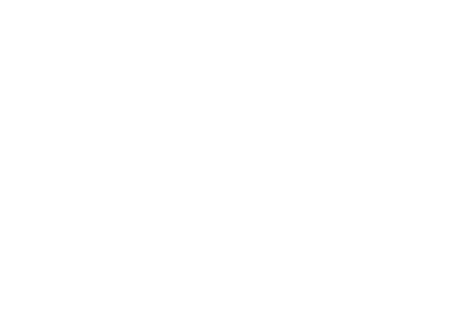

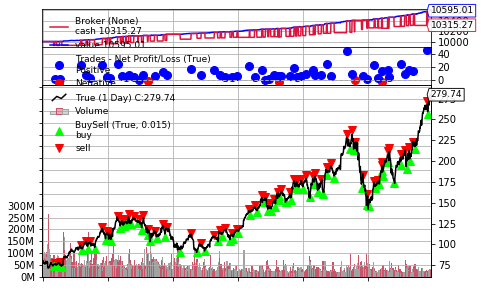

In [180]:
if __name__ == '__main__':
    cerebro = bt.Cerebro()
    #use $10,000 to test model
    cerebro.broker.setcash(10000.0)
    #set broker commission
    cerebro.broker.setcommission(commission=0.001)
    
    #True data
    dataframe0 = apple_df[['High', 'Low', 'Open', 'Close', 'Volume']]['2013-12-24':'2019-12-18']
    
    data0 = bt.feeds.PandasData(dataname=dataframe0)
    cerebro.adddata(data0, name='True')
    
    cerebro.addstrategy(ModelStrategy)
    
    #plot and print final values
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
    cerebro.run()
    print('Ending Portfolio Value: %.2f' % cerebro.broker.getvalue())
    cerebro.plot()